Lab 1 : Implement Delta and Batch Delta Rule  # Kunal Singh ID 2001081205

Outcome : The aim of learning is to minimize the error summed over all training cases.

The error can be a mean squared error (MSE error) between the desired output and the actual output.

This experiment uses concept of Linear Neuron ( linear filters)
In the experiment the neuron has a real-valued output which is a weighted sum of its inputs.

The loss function used in this code is mean squared error (MSE).

The code is first creating a tensor of input values and a tensor of target prices for training the model. Then, it creates an empty list to store the loss values for each iteration of the algorithm. It also creates a tensor of input values and target prices for testing the model and an empty list to store the test error for each iteration.

Delta Rule algorithm is implemented in a for loop that iterates over the training data for a fixed number of times. Within each iteration, it computes the predicted price for the current input using the current weights of the model. It then calculates the delta or the change in the weights required to reduce the loss for the current input. The delta is calculated using the learning rate and the error between the predicted price and the actual price. The new weights are obtained by adding the delta to the current weights. The loss for the current input is calculated using the mean squared error between the predicted price and the actual price.

After the training is complete, the loss values for each iteration are plotted using matplotlib. 
Two graphs are plotted using the data.

1.One for the training loss.
2.One for the test error loss. 

The x-axis of both the graphs represents the iteration number and the y-axis represents the loss value. The graphs show how the loss value reduces as the algorithm iteratively adjusts the weights of the model to minimize the loss function. The test error graph shows how well the model is generalizing to new data.


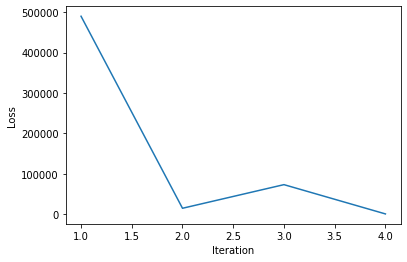

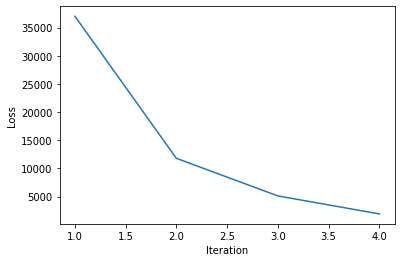

In [2]:
# Implement Training and testing for Delta Rule #

import torch
import matplotlib.pyplot as plt
# create a tensor with certain values
portion = torch.tensor([[5,2,4],
                        [3,3,3],
                        [0,5,1],
                        [2,1,2]])

#true_wt = torch.tensor([[150,50,100]])
start_wt = torch.tensor([50.0,50.0,50.0], dtype=float)
learning_rate = torch.tensor([1/70,1/12,1/27,2/20])
wt_change = torch.tensor([0,0,0,0])
target_price = torch.tensor([1250,900,350,550])

# Create empty lists to store the loss and weight values
losses = []

portion_test = torch.tensor([[6,1,3],
                        [2,2,1],
                        [4,5,0]])
target_price_test = torch.tensor([1250,500,850])
test_err_list = []

# Delta Rule :-
for i in range(0,4):
  #target_price = 0
  pred_wt = 0

  pred_wt = torch.sum(start_wt * portion[i,:])
  # pred_wt = torch.dot(start_wt, portion[i,:])
  # pred_wt = np.dot(start_wt, inp)
  #print(target_price)
  # print("Target price")
  # print(target_price[i])
  # print("Predictive price")
  # print(pred_wt)
  # print("X-Y price")
  # print(target_price[i] - pred_wt)
  delta_rule = learning_rate[i] * portion[i,:] * (target_price[i] - pred_wt)
  #print(learning_rate[i])
  # print("delta -> change in price ")
  # print(delta_rule)
  start_wt += delta_rule
  # print("New start weight")
  # print(start_wt)
      
  # Compute and store the loss
  # loss = torch.nn.MSELoss()(target_price[i],pred_wt)
  loss = torch.mean((target_price[i]-pred_wt)**2)
  total_loss_test = 0
  for j in range(3):
    pred_ = torch.sum(start_wt * portion_test[j,:])
    # pred_ = torch.dot(start_wt, portion_test[j,:])
    loss_test = torch.nn.MSELoss()(target_price_test[j],pred_)
    #loss_test = torch.mean((target_price[i]-pred_)**2)
    total_loss_test += loss_test
  # test_loss = torch.nn.MSELoss()(target_price[i],pred_wt)
  #loss = torch.mean((pred_wt - target_price)**2)
  test_loss = total_loss_test/3
  #print(test_loss.item())
  losses.append(loss.item())
  test_err_list.append(test_loss.item())
  #print('iteration: {}\n train_loss: {}\ntest_loss: {}'.format(i, loss, loss_test))
  #print('weight: {}\npred_price: {}'.format(start_wt, pred_wt))

# Plot the loss as a function of the iteration number
plt.plot(range(1, 5), losses)
plt.xlabel('Iteration') 
plt.ylabel('Loss')
plt.show()

plt.plot(range(1, 5), test_err_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Training and Testing for Batch Delta Rule.

The batch delta rule is a gradient descent-based optimization algorithm used to minimize the loss function of a machine learning model. 
It has follwing advantages.
1. Efficiency 
2. Stability 
3. Generalization
4. Scalability
.

For simplification , 
We have imported two classes from the torch.utils.data module in PyTorch, namely DataLoader and Dataset.

In the following code : the DataLoader and Dataset classes are used to create a custom dataset (CustomDataset) and a data loader (train_batch_loader) for loading training data in batches.

For the purpose of our experiment: 
The weight changes are summed over training cases. 
10 epochs and a batch size of 3 are required. Using the data samples as given in the lab1 pdf and the learning rate ε is 1/100:

Here we do not have different learing rate for diffrent batches but we have just one learning rate as it is a hyperparameter that controls the step size of the  update to the model parameters.

Having a single learning rate for the batch delta rule allows the algorithm to update the model parameters in a consistent and coordinated way across all examples in the batch.

Using a single learning rate is also more computationally efficient than using different learning rates for each example in the batch, as it avoids the need to compute and store a separate learning rate for each example

Observations:

1.The "CustomDataset" class is used to create a training and testing dataset.
The code then initializes the starting weight vector, the learning rate, and the number of epochs to be used in the training.

2.In the training loop, the code calculates the predicted values for each batch using the starting weight vector and the batch input values. Then, it calculates the error between the predicted and target values and updates the weight vector using the batch delta rule. The process is repeated for each batch in the training dataset.

3.The training loss and testing loss are calculated for each epoch and stored in the train_loss and test_loss lists, respectively.

4.Finally, the testing loss is plotted against the number of iterations to visualize the learning progress.

5.The plot shows that the testing loss decreases as the number of iterations increase, which indicates that the model is learning and getting closer to the optimal solution.
The plot also shows that the testing loss starts to plateau after a certain number of iterations, which suggests that the model is no longer improving significantly and may have reached its limit.


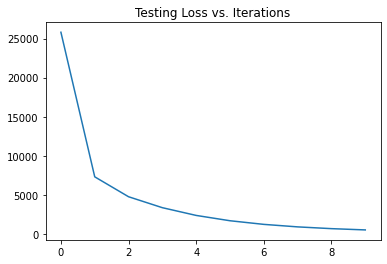

In [3]:
# define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]
        return x, y

## Training of Batch Delta Rule #

# create a tensor with certain values
portion = torch.tensor([[5,2,4],[3,3,3],[0,5,1],
                       [2,1,2],[1,0,5],[4,2,1],
                       [6,1,1],[2,3,4],[7,3,0],
                       [4,4,2],[1,5,7],[5,1,3]])

#true_wt = torch.tensor([[150,50,100]])
start_wt = torch.tensor([50,50,50], dtype=torch.float)
#learning_rate = torch.tensor([1/70,1/12,1/27,2/20])
target_price = torch.tensor([1250,900,350,
                            550,650,800,
                            1050,850,1200,
                            1000,1100,1100])
learning_rate = 1/100

train_batch = CustomDataset(portion, target_price)
train_batch_loader = DataLoader(train_batch, batch_size=3)
test_batch = CustomDataset(portion, target_price)
test_batch_loader = DataLoader(test_batch, batch_size=3)

start_wt = start_wt.float()
epoch = 10
train_loss = []
test_loss = []
for epoch in range(epoch):
    for batch_x, batch_y in train_batch_loader:
        batch_x = batch_x.float()
        batch_y = batch_y.float()
        wt_pred = torch.mv(batch_x,start_wt)
        err = batch_y - wt_pred  # error
        delta_w = learning_rate * torch.mv(torch.t(batch_x), err) / len(batch_x)  # weight update
        start_wt = start_wt + delta_w  # apply weight update
    train_loss.append(loss.item())

    for batch_x_t, batch_y_t in test_batch_loader:
        batch_x_t = batch_x_t.float()
        batch_y_t = batch_y_t.float()
        wt_pred_t = torch.mv(batch_x_t,start_wt)
        err_t = batch_y_t - wt_pred_t  # error
        loss_t = torch.mean((err_t)**2)
    test_loss.append(loss_t.item())

#print("Final weights: ", start_wt)
plt.plot(test_loss)
plt.title('Testing Loss vs. Iterations')
plt.show()
